<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_study/blob/main/tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [6]:
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 179MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 102MB/s] 


In [7]:
with open('/content/sign_mnist_test.csv') as filename:
  csv_reader=csv.reader(filename,delimiter=',')
  first_line=True
  for i in csv_reader:
    print(i)

['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
def get_data(filename):
  with open(filename) as training_file:
      ### START CODE HERE
      csv_reader = csv.reader(training_file, delimiter=',')
      first_line=True
      temp_images=[]
      temp_labels=[]

      for i in csv_reader:
        if first_line:
          first_line=False
        else:
          temp_labels.append(i[0])
          image_data=i[1:785]
          #28*28=784
          image_data_as_array=np.array_split(image_data,28)
          temp_images.append(image_data_as_array)
  images=np.array(temp_images).astype('float')
  labels=np.array(temp_labels).astype('float')
  return images,labels



training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [31]:
print(training_images[1])
training_images=np.expand_dims(training_images,axis=3)
print(training_images[1])

testing_images=np.expand_dims(testing_images,axis=3)
train_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale=1/255
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
print(len(training_images))
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

[[155. 157. 156. 156. 156. 157. 156. 158. 158. 157. 158. 156. 154. 154.
  153. 152. 151. 149. 149. 148. 147. 146. 144. 142. 143. 138.  92. 108.]
 [158. 159. 159. 159. 160. 160. 160. 160. 160. 160. 160. 159. 158. 157.
  155. 154. 153. 152. 151. 150. 149. 149. 147. 147. 146. 142. 116. 143.]
 [161. 161. 161. 161. 162. 161. 162. 162. 162. 162. 161. 161. 161. 160.
  159. 158. 156. 155. 154. 153. 152. 152. 151. 150. 147. 147. 125. 140.]
 [165. 164. 164. 165. 165. 165. 165. 165. 164. 164. 164. 165. 163. 163.
  162. 161. 159. 159. 158. 156. 156. 155. 152. 153. 154. 151. 124. 126.]
 [166. 167. 166. 167. 167. 166. 167. 167. 167. 167. 166. 167. 165. 165.
  164. 163. 162. 162. 161. 160. 156. 151. 154. 176. 145. 122. 144. 100.]
 [168. 169. 168. 169. 169. 168. 169. 170. 170. 170. 169. 168. 167. 166.
  167. 165. 162. 159. 159. 156. 151. 165. 171. 146.  94. 130. 159. 111.]
 [171. 171. 170. 171. 171. 171. 172. 171. 171. 171. 172. 169. 169. 170.
  166. 165. 160. 157. 170. 177. 171. 153. 124.  96. 125. 1

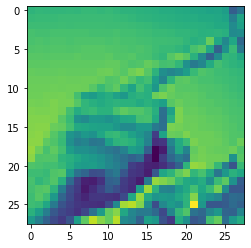

In [38]:
import matplotlib.pyplot as plt
img=training_images[1]
#training_images→(27455,28,28,1)27455枚で28*28でグレー
plt.imshow(img.reshape(28,28))
plt.show()

In [42]:
model = tf.keras.models.Sequential([                              
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #26のクラスに分類分け
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    )
model.compile(optimizer = tf.optimizers.Adam(), ### YOUR CODE HERE)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels,batch_size=32),
                    steps_per_epoch=len(training_images)/32,
                    epochs=15,
                    validation_data=validation_datagen.flow(testing_images,testing_labels,batch_size=32),
                    validation_steps=len(testing_images)/32)### YOUR CODE HERE)
model.evaluate(testing_images, testing_labels)

Epoch 1/15
857/857 [==============================] - 9s 10ms/step - loss: 2.8378 - accuracy: 0.1409 - val_loss: 2.3286 - val_accuracy: 0.2366
Epoch 2/15
857/857 [==============================] - 9s 10ms/step - loss: 2.2100 - accuracy: 0.3038 - val_loss: 1.6337 - val_accuracy: 0.4866
Epoch 3/15
857/857 [==============================] - 9s 10ms/step - loss: 1.8896 - accuracy: 0.3983 - val_loss: 1.4570 - val_accuracy: 0.4898
Epoch 4/15
857/857 [==============================] - 9s 10ms/step - loss: 1.6644 - accuracy: 0.4599 - val_loss: 1.2540 - val_accuracy: 0.5623
Epoch 5/15
857/857 [==============================] - 9s 10ms/step - loss: 1.4966 - accuracy: 0.5111 - val_loss: 1.0395 - val_accuracy: 0.6233
Epoch 6/15
857/857 [==============================] - 9s 10ms/step - loss: 1.3728 - accuracy: 0.5494 - val_loss: 0.8279 - val_accuracy: 0.6871
Epoch 7/15
857/857 [==============================] - 9s 10ms/step - loss: 1.2813 - accuracy: 0.5810 - val_loss: 0.7782 - val_accuracy: 0.7133

[309.3313903808594, 0.5085052847862244]

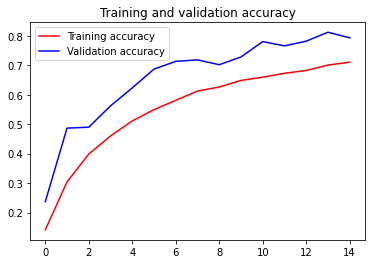

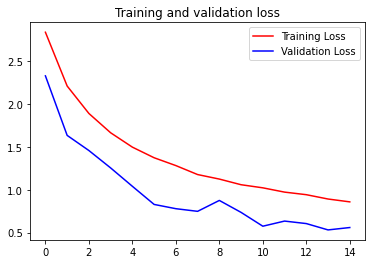

In [43]:
import matplotlib.pyplot as plt
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()